# Lesson 2: Interacting with a CSV Data

## Setup and connect to the Azure OpenAI endpoint

**Note**: The pre-configured cloud resource grants you access to the Azure OpenAI GPT model. The key and endpoint provided below are intended for teaching purposes only. Your notebook environment is already set up with the necessary keys, which may differ from those used by the instructor during the filming.

In [1]:
import os 
import pandas as pd

from IPython.display import Markdown, HTML, display
from langchain.schema import HumanMessage
from langchain_openai import AzureChatOpenAI

model = AzureChatOpenAI(
    openai_api_version="2023-05-15",
    azure_deployment="gpt-4-1106",
    azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT"),
)

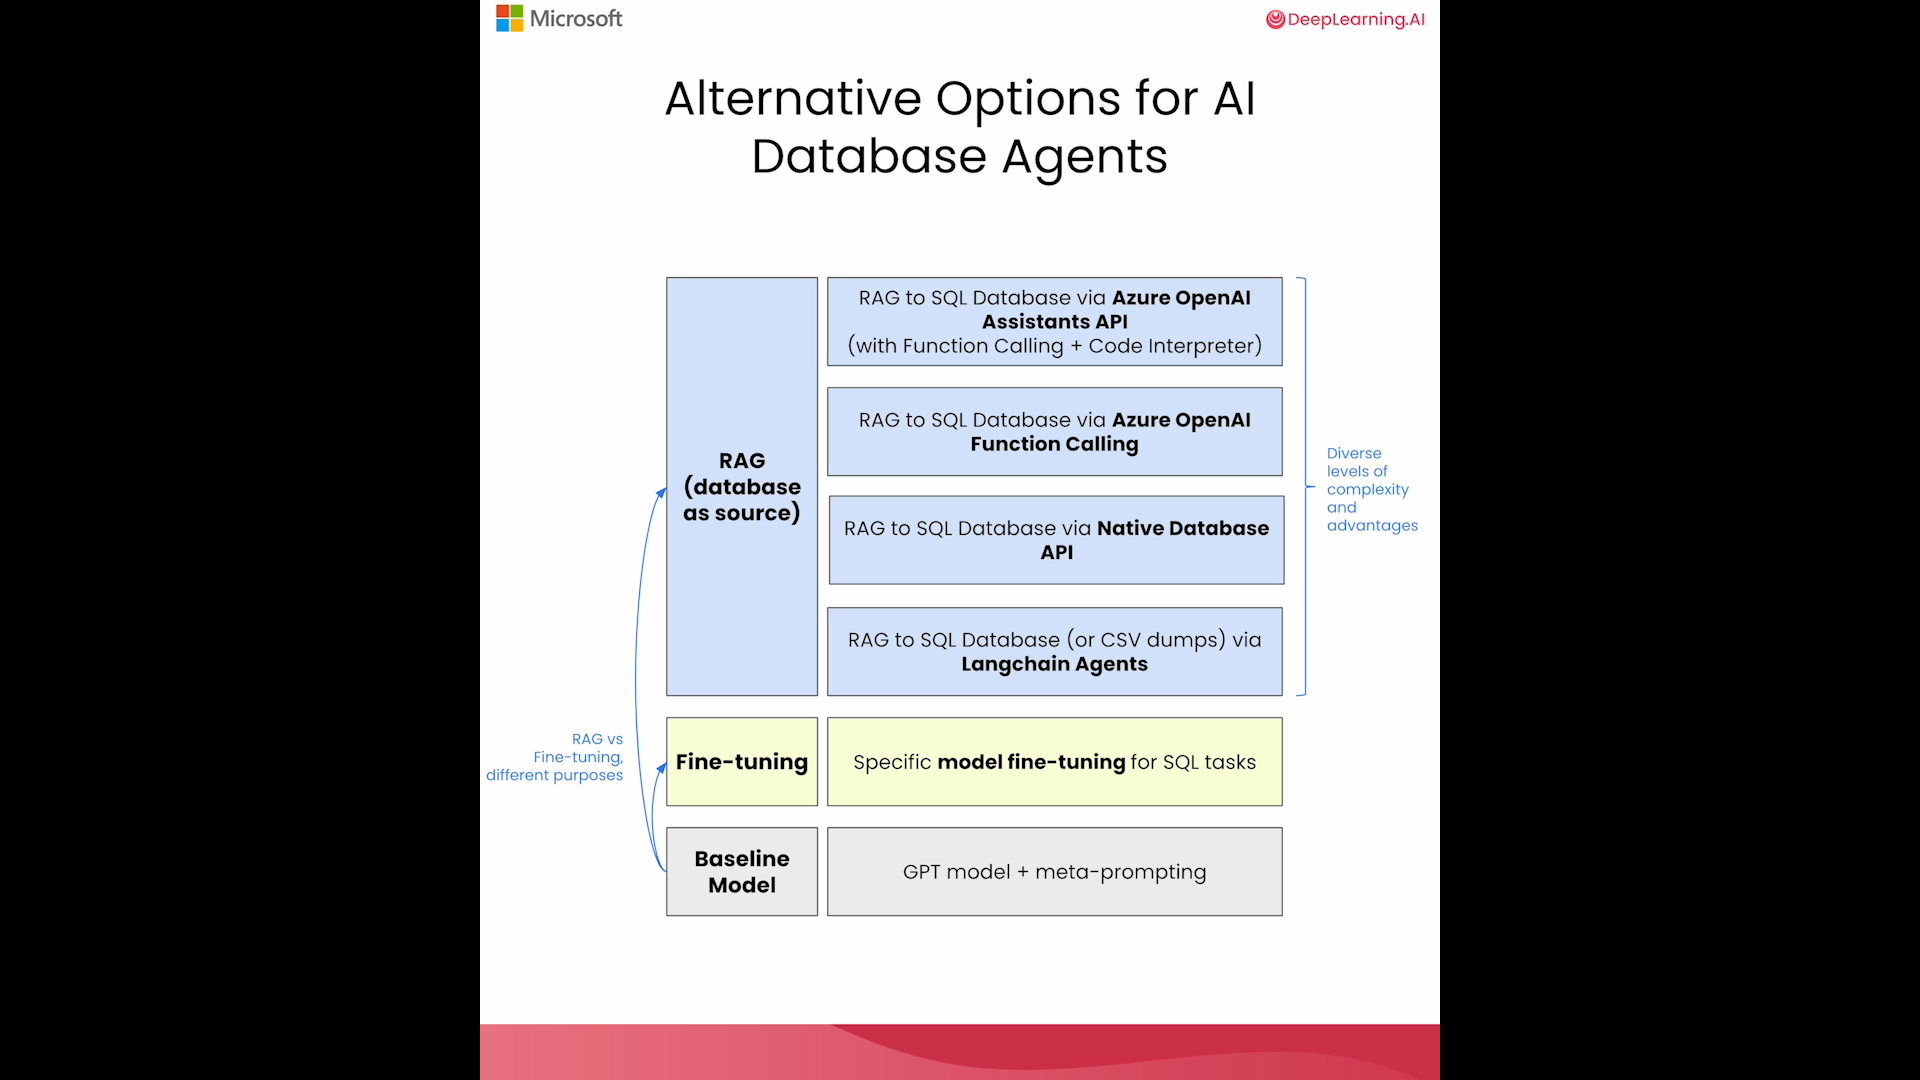

## Load the dataset

**Note**: To access the data locally, use the following code:

```
os.makedirs("data",exist_ok=True)
!wget https://covidtracking.com/data/download/all-states-history.csv -P ./data/
file_url = "./data/all-states-history.csv"
df = pd.read_csv(file_url).fillna(value = 0)
```

In [2]:
df = pd.read_csv("./data/all-states-history.csv").fillna(value = 0)

## Prepare the Langchain dataframe agent

In [3]:
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

agent = create_pandas_dataframe_agent(llm=model,df=df,verbose=True)

agent.invoke("how many rows are there?")



> Entering new AgentExecutor chain...
Thought: To find out how many rows there are in the dataframe, I can use the `.shape` attribute of the dataframe, which returns a tuple where the first element is the number of rows and the second is the number of columns.

Action: python_repl_ast
Action Input: df.shape
Observation: (20780, 41)
Thought:I now know the final answer

Final Answer: There are 20,780 rows in the dataframe.

> Finished chain.


{'input': 'how many rows are there?',
 'output': 'There are 20,780 rows in the dataframe.'}

## Design your prompt and ask your question

In [ ]:
CSV_PROMPT_PREFIX = """
First set the pandas display options to show all the columns,
get the column names, then answer the question.
"""

CSV_PROMPT_SUFFIX = """
- **ALWAYS** before giving the Final Answer, try another method.
Then reflect on the answers of the two methods you did and ask yourself
if it answers correctly the original question.
If you are not sure, try another method.
- If the methods tried do not give the same result,reflect and
try again until you have two methods that have the same result.
- If you still cannot arrive to a consistent result, say that
you are not sure of the answer.
- If you are sure of the correct answer, create a beautiful
and thorough response using Markdown.
- **DO NOT MAKE UP AN ANSWER OR USE PRIOR KNOWLEDGE,
ONLY USE THE RESULTS OF THE CALCULATIONS YOU HAVE DONE**.
- **ALWAYS**, as part of your "Final Answer", explain how you got
to the answer on a section that starts with: "\n\nExplanation:\n".
In the explanation, mention the column names that you used to get
to the final answer.
"""

QUESTION = "How may patients were hospitalized during July 2020" 
"in Texas, and nationwide as the total of all states?"
"Use the hospitalizedIncrease column" 


agent.invoke(CSV_PROMPT_PREFIX + QUESTION + CSV_PROMPT_SUFFIX)